In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from matplotlib import pyplot


In [2]:
data1 = pd.read_excel('dados.xlsx')
data1

shelf_life                          Category  carbohydrates  \
0           127  Biscoitos. Salgadinhos e Cereais           22.0   
1           128  Biscoitos. Salgadinhos e Cereais           21.0   
2           110  Biscoitos. Salgadinhos e Cereais           23.0   
3           110  Biscoitos. Salgadinhos e Cereais           23.0   
4           114  Biscoitos. Salgadinhos e Cereais           17.0   
..          ...                               ...            ...   
435           7        Leites e Fórmulas Infantis            8.8   
436           7        Leites e Fórmulas Infantis           11.0   
437           7        Leites e Fórmulas Infantis            3.7   
438           8                  Leite Fermentado           13.0   
439           8                  Leite Fermentado            8.0   

     dietary_fibre  energy_value  has_gluten  has_lactose  nutrition_portion  \
0              1.0         137.0           1            0               30.0   
1              0.9         143.0           1            1               30.0   
2              0.0         136.0           1            1               30.0   
3              0.0         137.0           1            1               30.0   
4              1.2         157.0           1            1               30.0   
..             ...           ...         ...          ...                ...   
435            1.6          90.0           0            0              115.0   
436            1.7          50.0           0            0              115.0   
437            2.5          21.0           0            0              115.0   
438            2.0          66.0           1            1              120.0   
439            2.0          39.0           1            1               75.0   

     proteins  saturated_fats  ...   gelificante   cianocobalmina  \
0         2.1             1.5  ...             0                0   
1         1.6             2.6  ...             0                0   
2         1.8             1.0  ...             0                0   
3         2.1             0.9  ...             0                0   
4         1.6             4.0  ...             0                0   
..        ...             ...  ...           ...              ...   
435       4.0             0.5  ...             0                0   
436       0.6             0.0  ...             0                0   
437       0.8             0.0  ...             0                0   
438       2.5             1.3  ...             0                0   
439       1.6             1.3  ...             0                0   

      ésteres de ácidos graxos   edulconates sucralose  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
..                         ...                     ...   
435                          0                       0   
436                          0                       0   
437                          0                       0   
438                          0                       0   
439                          0                       0   

      preparado de morango em pó  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
..                           ...   
435                            0   
436                            0   
437                            0   
438                            0   
439                            0   

      extrato de cereal sabor chocolate – ovomaltine   sulfato dezinco  \
0                                                  0                 0   
1                                                  0                 0   
2                                             

<AxesSubplot:xlabel='dietary_fibre'>

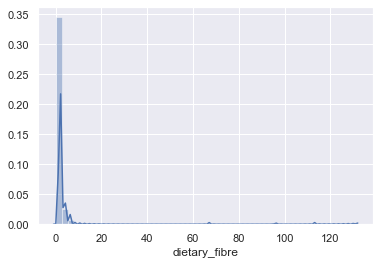

In [3]:
sns.distplot(data1['dietary_fibre'])

<AxesSubplot:xlabel='dietary_fibre'>

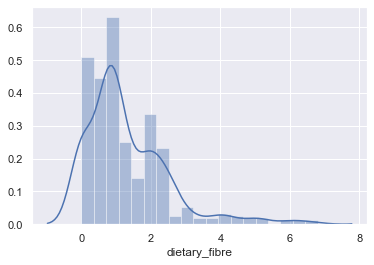

In [4]:
q = data1['dietary_fibre'].quantile(0.99)
data_2 = data1[data1['dietary_fibre']<q]
sns.distplot(data_2['dietary_fibre'])

In [5]:
data_2

shelf_life                          Category  carbohydrates  \
0           127  Biscoitos. Salgadinhos e Cereais           22.0   
1           128  Biscoitos. Salgadinhos e Cereais           21.0   
2           110  Biscoitos. Salgadinhos e Cereais           23.0   
3           110  Biscoitos. Salgadinhos e Cereais           23.0   
4           114  Biscoitos. Salgadinhos e Cereais           17.0   
..          ...                               ...            ...   
435           7        Leites e Fórmulas Infantis            8.8   
436           7        Leites e Fórmulas Infantis           11.0   
437           7        Leites e Fórmulas Infantis            3.7   
438           8                  Leite Fermentado           13.0   
439           8                  Leite Fermentado            8.0   

     dietary_fibre  energy_value  has_gluten  has_lactose  nutrition_portion  \
0              1.0         137.0           1            0               30.0   
1              0.9         143.0           1            1               30.0   
2              0.0         136.0           1            1               30.0   
3              0.0         137.0           1            1               30.0   
4              1.2         157.0           1            1               30.0   
..             ...           ...         ...          ...                ...   
435            1.6          90.0           0            0              115.0   
436            1.7          50.0           0            0              115.0   
437            2.5          21.0           0            0              115.0   
438            2.0          66.0           1            1              120.0   
439            2.0          39.0           1            1               75.0   

     proteins  saturated_fats  ...   gelificante   cianocobalmina  \
0         2.1             1.5  ...             0                0   
1         1.6             2.6  ...             0                0   
2         1.8             1.0  ...             0                0   
3         2.1             0.9  ...             0                0   
4         1.6             4.0  ...             0                0   
..        ...             ...  ...           ...              ...   
435       4.0             0.5  ...             0                0   
436       0.6             0.0  ...             0                0   
437       0.8             0.0  ...             0                0   
438       2.5             1.3  ...             0                0   
439       1.6             1.3  ...             0                0   

      ésteres de ácidos graxos   edulconates sucralose  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
..                         ...                     ...   
435                          0                       0   
436                          0                       0   
437                          0                       0   
438                          0                       0   
439                          0                       0   

      preparado de morango em pó  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
..                           ...   
435                            0   
436                            0   
437                            0   
438                            0   
439                            0   

      extrato de cereal sabor chocolate – ovomaltine   sulfato dezinco  \
0                                                  0                 0   
1                                                  0                 0   
2                                             

<AxesSubplot:xlabel='nutrition_portion'>

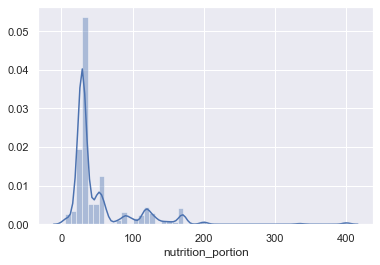

In [6]:
sns.distplot(data_2['nutrition_portion'])

<AxesSubplot:xlabel='nutrition_portion'>

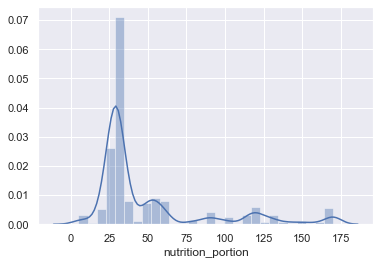

In [7]:
q = data_2['nutrition_portion'].quantile(0.99)
data_3 = data_2[data_2['nutrition_portion']<q]
sns.distplot(data_3['nutrition_portion'])

In [8]:
data_2.head()

shelf_life                          Category  carbohydrates  dietary_fibre  \
0         127  Biscoitos. Salgadinhos e Cereais           22.0            1.0   
1         128  Biscoitos. Salgadinhos e Cereais           21.0            0.9   
2         110  Biscoitos. Salgadinhos e Cereais           23.0            0.0   
3         110  Biscoitos. Salgadinhos e Cereais           23.0            0.0   
4         114  Biscoitos. Salgadinhos e Cereais           17.0            1.2   

   energy_value  has_gluten  has_lactose  nutrition_portion  proteins  \
0         137.0           1            0               30.0       2.1   
1         143.0           1            1               30.0       1.6   
2         136.0           1            1               30.0       1.8   
3         137.0           1            1               30.0       2.1   
4         157.0           1            1               30.0       1.6   

   saturated_fats  ...   gelificante   cianocobalmina  \
0             1.5  ...             0                0   
1             2.6  ...             0                0   
2             1.0  ...             0                0   
3             0.9  ...             0                0   
4             4.0  ...             0                0   

    ésteres de ácidos graxos   edulconates sucralose  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

    preparado de morango em pó  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

    extrato de cereal sabor chocolate – ovomaltine   sulfato dezinco  \
0                                                0                 0   
1                                                0                 0   
2                                                0                 0   
3                                                0                 0   
4                                                0                 0   

    caseinato de cálcio   tomate seco desidratado   fosfato de cálcio  
0                     0                         0                   0  
1                     0                         0                   0  
2                     0                         0                   0  
3                     0                         0                   0  
4                     0                         0                   0  

[5 rows x 813 columns]

<AxesSubplot:xlabel='proteins'>

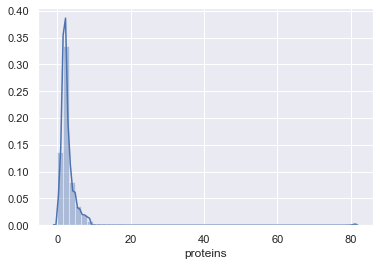

In [9]:
sns.distplot(data_3['proteins'])

In [10]:
q = data_3['proteins'].quantile(0.99)
data_4 = data_3[data_3['proteins']<q]

<AxesSubplot:xlabel='proteins'>

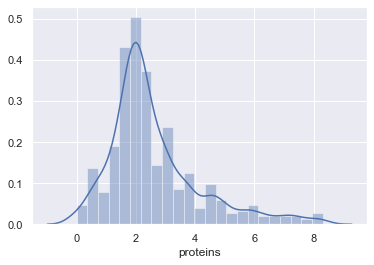

In [11]:
sns.distplot(data_4['proteins'])

<AxesSubplot:xlabel='sodium'>

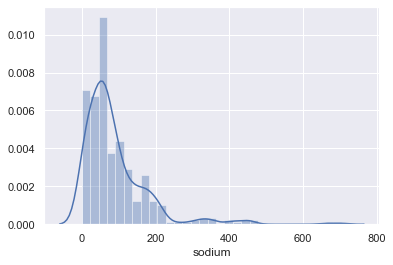

In [12]:
sns.distplot(data_4['sodium'])

In [13]:
q = data_4['sodium'].quantile(0.99)
data_5 = data_4[data_4['sodium']<q]

<AxesSubplot:xlabel='sodium'>

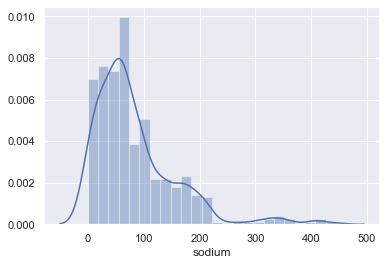

In [14]:
sns.distplot(data_5['sodium'])

c:\python\python385\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='suar'>

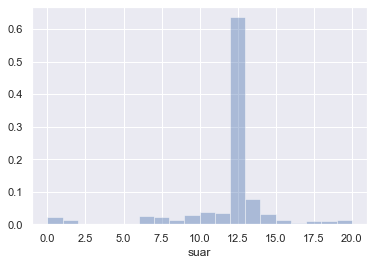

In [15]:
sns.distplot(data_5['suar'])

In [16]:
q = data_5['suar'].quantile(0.05)
data6 = data_5[data_5['suar']>q]

c:\python\python385\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='suar'>

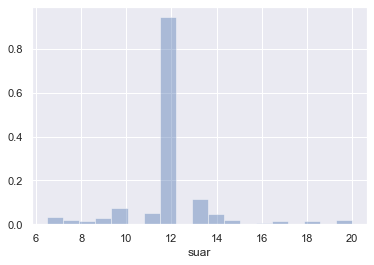

In [17]:
sns.distplot(data6['suar'])

c:\python\python385\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='weiht'>

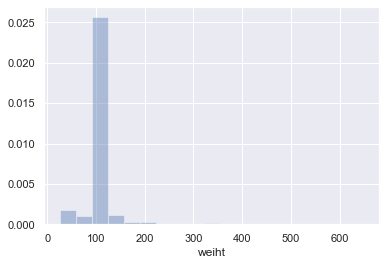

In [18]:
sns.distplot(data6['weiht'])

In [19]:
q = data6['weiht'].quantile(0.99)
data = data6[data6['weiht']<q]

c:\python\python385\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='weiht'>

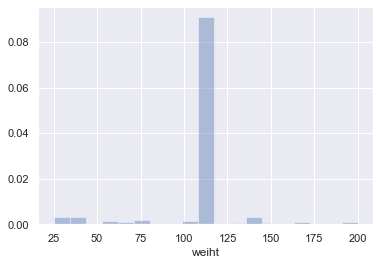

In [20]:
sns.distplot(data['weiht'])

In [21]:
#data['shelf_life'] = np.random.randint(120, 160, data.shape[0])

In [22]:
data.describe()

shelf_life  carbohydrates  dietary_fibre  energy_value  has_gluten  \
count  392.000000     392.000000     392.000000    392.000000  392.000000   
mean    96.107143      17.215561       1.227143    121.349490    0.612245   
std     91.455068       5.531111       1.033379     37.760083    0.487861   
min      3.000000       0.000000       0.000000      0.000000    0.000000   
25%      9.000000      14.000000       0.600000    111.750000    0.000000   
50%    112.000000      17.000000       0.900000    131.000000    1.000000   
75%    124.000000      20.250000       2.000000    138.000000    1.000000   
max    728.000000      36.000000       5.900000    295.000000    1.000000   

       has_lactose  nutrition_portion    proteins  saturated_fats      sodium  \
count   392.000000         392.000000  392.000000      392.000000  392.000000   
mean      0.316327          48.789541    2.551276        2.169898   83.228418   
std       0.465636          37.535299    1.501116        1.497504   74.605622   
min       0.000000           5.000000    0.000000        0.000000    0.000000   
25%       0.000000          30.000000    1.700000        1.000000   31.000000   
50%       0.000000          30.000000    2.100000        1.800000   64.000000   
75%       1.000000          53.000000    3.000000        3.300000   98.000000   
max       1.000000         170.000000    8.300000        7.100000  444.000000   

       ...   gelificante   cianocobalmina   ésteres de ácidos graxos  \
count  ...         392.0            392.0                      392.0   
mean   ...           0.0              0.0                        0.0   
std    ...           0.0              0.0                        0.0   
min    ...           0.0              0.0                        0.0   
25%    ...           0.0              0.0                        0.0   
50%    ...           0.0              0.0                        0.0   
75%    ...           0.0              0.0                        0.0   
max    ...           0.0              0.0                        0.0   

        edulconates sucralose   preparado de morango em pó  \
count                   392.0                        392.0   
mean                      0.0                          0.0   
std                       0.0                          0.0   
min                       0.0                          0.0   
25%                       0.0                          0.0   
50%                       0.0                          0.0   
75%                       0.0                          0.0   
max                       0.0                          0.0   

        extrato de cereal sabor chocolate – ovomaltine   sulfato dezinco  \
count                                            392.0             392.0   
mean                                               0.0               0.0   
std                                                0.0               0.0   
min                                                0.0               0.0   
25%                                                0.0               0.0   
50%                                                0.0               0.0   
75%                                                0.0               0.0   
max                                                0.0               0.0   

        caseinato de cálcio   tomate seco desidratado   fosfato de cálcio  
count                 392.0                     392.0               392.0  
mean                    0.0                       0.0                 0.0  
std                     0.0                       0.0                 0.0  
min                     0.0                       0.0                 0.0  
25%                     0.0                       0.0                 0.0  
50%                     0.0                       0.0                 0.0  
75%                     0.0                       0.0                 0.0  
max                     0.0                       0.0                 0.0  

[8 ro

In [23]:
data.isnull() .sum()

shelf_life                                         0
Category                                           0
carbohydrates                                      0
dietary_fibre                                      0
energy_value                                       0
                                                  ..
 extrato de cereal sabor chocolate – ovomaltine    0
 sulfato dezinco                                   0
 caseinato de cálcio                               0
 tomate seco desidratado                           0
 fosfato de cálcio                                 0
Length: 813, dtype: int64

In [24]:
data.mean()

shelf_life                                          96.107143
carbohydrates                                       17.215561
dietary_fibre                                        1.227143
energy_value                                       121.349490
has_gluten                                           0.612245
                                                      ...    
 extrato de cereal sabor chocolate – ovomaltine      0.000000
 sulfato dezinco                                     0.000000
 caseinato de cálcio                                 0.000000
 tomate seco desidratado                             0.000000
 fosfato de cálcio                                   0.000000
Length: 812, dtype: float64

In [25]:
#data.fillna(data.mean(), inplace=True)

In [26]:
#data.isnull() .sum()

In [27]:
data.head()

shelf_life                          Category  carbohydrates  dietary_fibre  \
0         127  Biscoitos. Salgadinhos e Cereais           22.0            1.0   
1         128  Biscoitos. Salgadinhos e Cereais           21.0            0.9   
2         110  Biscoitos. Salgadinhos e Cereais           23.0            0.0   
3         110  Biscoitos. Salgadinhos e Cereais           23.0            0.0   
4         114  Biscoitos. Salgadinhos e Cereais           17.0            1.2   

   energy_value  has_gluten  has_lactose  nutrition_portion  proteins  \
0         137.0           1            0               30.0       2.1   
1         143.0           1            1               30.0       1.6   
2         136.0           1            1               30.0       1.8   
3         137.0           1            1               30.0       2.1   
4         157.0           1            1               30.0       1.6   

   saturated_fats  ...   gelificante   cianocobalmina  \
0             1.5  ...             0                0   
1             2.6  ...             0                0   
2             1.0  ...             0                0   
3             0.9  ...             0                0   
4             4.0  ...             0                0   

    ésteres de ácidos graxos   edulconates sucralose  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

    preparado de morango em pó  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

    extrato de cereal sabor chocolate – ovomaltine   sulfato dezinco  \
0                                                0                 0   
1                                                0                 0   
2                                                0                 0   
3                                                0                 0   
4                                                0                 0   

    caseinato de cálcio   tomate seco desidratado   fosfato de cálcio  
0                     0                         0                   0  
1                     0                         0                   0  
2                     0                         0                   0  
3                     0                         0                   0  
4                     0                         0                   0  

[5 rows x 813 columns]

In [28]:
data.columns.values

array(['shelf_life', 'Category', 'carbohydrates', 'dietary_fibre',
       'energy_value', 'has_gluten', 'has_lactose', 'nutrition_portion',
       'proteins', 'saturated_fats', 'sodium', 'suar', 'total_fats',
       'vitamin_a', 'vitamin_b1', 'vitamin_b2', 'vitamin_b6', 'vitamin_c',
       'weiht', 'amido', 'fosfato monocálcico', 'farinha de centeio',
       'sal', 'gordura vegetal', 'bicarbonato de sódio', 'cevada',
       'centeio', 'poliglicerol polirricinoleato', 'de soja', 'trigo',
       'ferro', 'açúcar', 'aromatizantes', 'farinha de aveia integral',
       'avelã', 'lactose', 'gordura anidra de leite', 'amêndoa',
       'ácido fólico', 'confeitos sabor chocolate', 'farinha de rosca',
       'fresco', 'aromatizante', 'leite integral', 'glicose',
       'fermentos químicos',
       'ésteres de ácido ricinoléico interesterificado de poliglicerol',
       'legível', 'óleo de milho', 'farinha de trigo enriquecida',
       'cacau em pó', 'emulsificante', 'nozes', 'lecitina de soja',


In [29]:
data_with_dummies = pd.get_dummies(data)

In [30]:
data_with_dummies.columns.values

array(['shelf_life', 'carbohydrates', 'dietary_fibre', 'energy_value',
       'has_gluten', 'has_lactose', 'nutrition_portion', 'proteins',
       'saturated_fats', 'sodium', 'suar', 'total_fats', 'vitamin_a',
       'vitamin_b1', 'vitamin_b2', 'vitamin_b6', 'vitamin_c', 'weiht',
       'amido', 'fosfato monocálcico', 'farinha de centeio', 'sal',
       'gordura vegetal', 'bicarbonato de sódio', 'cevada', 'centeio',
       'poliglicerol polirricinoleato', 'de soja', 'trigo', 'ferro',
       'açúcar', 'aromatizantes', 'farinha de aveia integral', 'avelã',
       'lactose', 'gordura anidra de leite', 'amêndoa', 'ácido fólico',
       'confeitos sabor chocolate', 'farinha de rosca', 'fresco',
       'aromatizante', 'leite integral', 'glicose', 'fermentos químicos',
       'ésteres de ácido ricinoléico interesterificado de poliglicerol',
       'legível', 'óleo de milho', 'farinha de trigo enriquecida',
       'cacau em pó', 'emulsificante', 'nozes', 'lecitina de soja',
       'emulsifican

In [31]:
data_preprocessed = data_with_dummies

In [32]:
data_preprocessed

shelf_life  carbohydrates  dietary_fibre  energy_value  has_gluten  \
0           127           22.0            1.0         137.0           1   
1           128           21.0            0.9         143.0           1   
2           110           23.0            0.0         136.0           1   
3           110           23.0            0.0         137.0           1   
4           114           17.0            1.2         157.0           1   
..          ...            ...            ...           ...         ...   
435           7            8.8            1.6          90.0           0   
436           7           11.0            1.7          50.0           0   
437           7            3.7            2.5          21.0           0   
438           8           13.0            2.0          66.0           1   
439           8            8.0            2.0          39.0           1   

     has_lactose  nutrition_portion  proteins  saturated_fats  sodium  ...  \
0              0               30.0       2.1             1.5    44.0  ...   
1              1               30.0       1.6             2.6    28.0  ...   
2              1               30.0       1.8             1.0    54.0  ...   
3              1               30.0       2.1             0.9    64.0  ...   
4              1               30.0       1.6             4.0    35.0  ...   
..           ...                ...       ...             ...     ...  ...   
435            0              115.0       4.0             0.5    10.0  ...   
436            0              115.0       0.6             0.0     0.0  ...   
437            0              115.0       0.8             0.0    20.0  ...   
438            1              120.0       2.5             1.3    43.0  ...   
439            1               75.0       1.6             1.3    27.0  ...   

      fosfato de cálcio  Category_Arroz e Grãos  \
0                     0                       0   
1                     0                       0   
2                     0                       0   
3                     0                       0   
4                     0                       0   
..                  ...                     ...   
435                   0                       0   
436                   0                       0   
437                   0                       0   
438                   0                       0   
439                   0                       0   

     Category_Biscoitos. Salgadinhos e Cereais  Category_Cereais  \
0                                            1                 0   
1                                            1                 0   
2                                            1                 0   
3                                            1                 0   
4                                            1                 0   
..                                         ...               ...   
435                                          0                 0   
436                                          0                 0   
437                                          0                 0   
438                                          0                 0   
439                                          0                 0   

     Category_Doces. Sobremesas e Confeitaria  Category_Iogurtes e Laticínios  \
0                                           0                               0   
1                                           0                               0   
2                                           0                               0   
3                                           0                               0   
4                                           0                               0   
..                                        ...                             ...   
435                                         0                               0   
436                                         0                               0   
437     

In [33]:
targets = data_preprocessed['shelf_life']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['shelf_life'],axis=1)

In [34]:
model = sm.OLS(targets,inputs)
results = model.fit()
print(results.summary())

c:\python\python385\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


                            OLS Regression Results                            
Dep. Variable:             shelf_life   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     121.4
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.97e-38
Time:                        11:20:18   Log-Likelihood:                -985.26
No. Observations:                 392   AIC:                             2665.
Df Residuals:                      45   BIC:                             4043.
Df Model:                         346                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [35]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [36]:
inputs_scaled = scaler.transform(inputs)

In [37]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=52)

In [38]:
x_train.shape

(313, 820)

In [39]:
x_test[0]

array([-0.94415514, -0.31698052, -0.69870513, -1.25656172,  1.47013276,
       -0.76797929, -0.70122436,  0.1538534 , -0.8083223 , -2.33219893,
       -0.154523  , -0.07878151, -0.14945351, -0.05645103, -0.05670798,
        0.08699039,  0.18146705, -0.12467575, -0.10153462, -0.08781846,
       -0.1617962 , -0.15329284, -0.10153462, -0.12467575, -0.08781846,
       -0.10153462, -0.11366572, -0.07161149, -0.19245009, -0.19245009,
       -0.11366572, 19.77371993, -0.08781846, -0.08781846, -0.05057217,
       -0.10153462, -0.14433757, -0.05057217, -0.05057217, -0.05057217,
       -0.1617962 , -0.05057217, -0.05057217, -0.11366572, -0.05057217,
        0.        , -0.05057217, -0.1617962 , -0.11366572, -0.07161149,
       -0.05057217, -0.07161149, -0.07161149, -0.05057217, -0.05057217,
       -0.08781846, -0.07161149, -0.05057217, -0.05057217,  0.        ,
       -0.05057217, -0.10153462,  0.        , -0.07161149, -0.05057217,
       -0.07161149, -0.07161149, -0.05057217, -0.08781846, -0.05

In [112]:
#from sklearn.neural_network import MLPClassifier
#reg = MLPClassifier(random_state=1, max_iter=300)
#reg.fit(x_train,y_train)

#from sklearn.neural_network import MLPClassifier
#reg = MLPClassifier(solver='adam',hidden_layer_sizes=(100,100,100))
#reg.fit(x_train,y_train)

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

reg = DecisionTreeClassifier(max_depth=20)
reg.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [113]:
reg.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [114]:
y_train

236    121
3      110
194    108
398    728
364      3
127    121
348     55
44      63
309      9
6      124
35     114
305      8
347     59
255      7
182    118
22      55
215    113
60      57
430      7
279    384
228     61
395    127
0      127
180    132
42     108
90     124
368    131
197    130
339      8
45     122
429      8
371    111
401    711
400    128
365    126
122    119
327      8
225    128
100    108
99     114
311      7
2      110
408      8
123    118
317      8
141    128
237    122
80     128
162    132
202    113
378    109
84     115
50       3
340      8
130    122
426      7
217    125
31     113
26      54
112    110
98     118
333      8
352    117
190     54
63      60
8       63
328      8
278    343
24      64
428      8
331      8
244      9
379    132
418      7
88     117
209    127
75     126
349     58
173    120
143    125
198    119
258    127
21      66
359    263
168    129
15      54
146    130
210    123
58      56
95     126
389    297

In [115]:
y_hat = reg.predict(x_train)

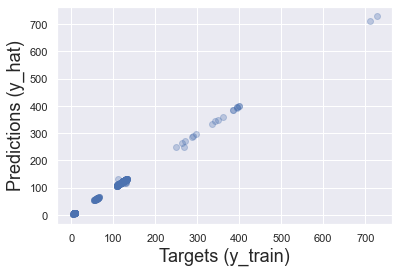

In [116]:
plt.scatter(y_train, y_hat,alpha=0.3)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim()
plt.ylim()
plt.show()

c:\python\python385\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Residuals PDF')

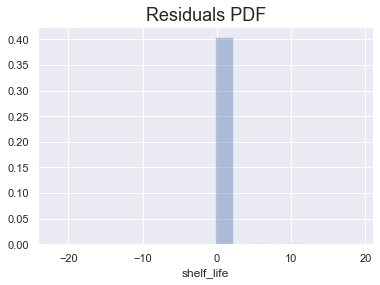

In [117]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

In [118]:
y_pred = reg.predict(x_test)

In [119]:
reg.score(x_train,y_train)

0.9744408945686901

In [120]:
reg.score(x_test,y_test)

0.08860759493670886

Text(0.5, 1.0, 'Residuals PDF')

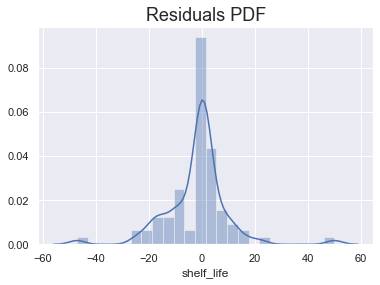

In [121]:
sns.distplot(y_test - y_pred)

# Include a title
plt.title("Residuals PDF", size=18)

In [122]:
#reg.intercept_

In [123]:
#reg.coef_

In [124]:
#reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
#reg_summary['Weights'] = reg.coef_
#reg_summary

In [125]:
y_hat_test = reg.predict(x_test)

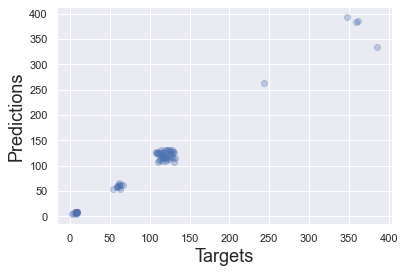

In [126]:
plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.xlim()
plt.ylim()
plt.show()

In [127]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()


Prediction
0         127
1         128
2         132
3         132
4         124

In [128]:
df_pf['Target'] = y_test
df_pf

Prediction  Target
0          127     119
1          128     108
2          132     114
3          132     119
4          124     127
5            8       7
6          119     125
7          132     123
8          132     122
9          109     117
10         124     110
11         128     111
12          63      61
13         125     115
14         125     109
15         115     132
16         117     128
17           7       6
18         385     362
19         124     115
20         116     114
21           8       8
22         130     123
23         335     385
24         117     121
25           8       8
26           8       7
27         115     123
28          63      66
29           8       9
30         125     128
31           9       8
32          59      59
33         128     126
34           8       9
35          63      64
36         128     116
37         111     113
38          59      61
39         384     359
40         117     115
41           9       7
42           5       3
43         115     129
44         126     112
45          66      61
46           8       9
47         108     130
48           8       9
49         108     110
50           6       4
51           8       7
52         113     121
53         132     128
54         122     114
55         132     125
56           6       8
57         394     347
58         118     118
59          59      59
60         118     119
61         127     130
62           4       8
63         111     112
64          55      63
65         113     124
66           8       7
67           7       9
68         263     244
69          54      54
70          60      59
71         115     117
72         118     120
73           8       8
74         125     108
75          63      62
76         109     121
77         119     118
78         127     129

In [129]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    119
1    108
2    114
3    119
4    127
Name: shelf_life, dtype: int64

In [130]:
df_pf['Target'] = y_test
df_pf

Prediction  Target
0          127     119
1          128     108
2          132     114
3          132     119
4          124     127
5            8       7
6          119     125
7          132     123
8          132     122
9          109     117
10         124     110
11         128     111
12          63      61
13         125     115
14         125     109
15         115     132
16         117     128
17           7       6
18         385     362
19         124     115
20         116     114
21           8       8
22         130     123
23         335     385
24         117     121
25           8       8
26           8       7
27         115     123
28          63      66
29           8       9
30         125     128
31           9       8
32          59      59
33         128     126
34           8       9
35          63      64
36         128     116
37         111     113
38          59      61
39         384     359
40         117     115
41           9       7
42           5       3
43         115     129
44         126     112
45          66      61
46           8       9
47         108     130
48           8       9
49         108     110
50           6       4
51           8       7
52         113     121
53         132     128
54         122     114
55         132     125
56           6       8
57         394     347
58         118     118
59          59      59
60         118     119
61         127     130
62           4       8
63         111     112
64          55      63
65         113     124
66           8       7
67           7       9
68         263     244
69          54      54
70          60      59
71         115     117
72         118     120
73           8       8
74         125     108
75          63      62
76         109     121
77         119     118
78         127     129

In [131]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [132]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction  Target  Residual  Difference%
0          127     119        -8         6.72
1          128     108       -20        18.52
2          132     114       -18        15.79
3          132     119       -13        10.92
4          124     127         3         2.36
5            8       7        -1        14.29
6          119     125         6         4.80
7          132     123        -9         7.32
8          132     122       -10         8.20
9          109     117         8         6.84
10         124     110       -14        12.73
11         128     111       -17        15.32
12          63      61        -2         3.28
13         125     115       -10         8.70
14         125     109       -16        14.68
15         115     132        17        12.88
16         117     128        11         8.59
17           7       6        -1        16.67
18         385     362       -23         6.35
19         124     115        -9         7.83
20         116     114        -2         1.75
21           8       8         0         0.00
22         130     123        -7         5.69
23         335     385        50        12.99
24         117     121         4         3.31
25           8       8         0         0.00
26           8       7        -1        14.29
27         115     123         8         6.50
28          63      66         3         4.55
29           8       9         1        11.11
30         125     128         3         2.34
31           9       8        -1        12.50
32          59      59         0         0.00
33         128     126        -2         1.59
34           8       9         1        11.11
35          63      64         1         1.56
36         128     116       -12        10.34
37         111     113         2         1.77
38          59      61         2         3.28
39         384     359       -25         6.96
40         117     115        -2         1.74
41           9       7        -2        28.57
42           5       3        -2        66.67
43         115     129        14        10.85
44         126     112       -14        12.50
45          66      61        -5         8.20
46           8       9         1        11.11
47         108     130        22        16.92
48           8       9         1        11.11
49         108     110         2         1.82
50           6       4        -2        50.00
51           8       7        -1        14.29
52         113     121         8         6.61
53         132     128        -4         3.12
54         122     114        -8         7.02
55         132     125        -7         5.60
56           6       8         2        25.00
57         394     347       -47        13.54
58         118     118         0         0.00
59          59      59         0         0.00
60         118     119         1         0.84
61         127     130         3         2.31
62           4       8         4        50.00
63         111     112         1         0.89
64          55      63         8        12.70
65         113     124        11         8.87
66           8       7        -1        14.29
67           7       9         2        22.22
68         263     244       -19         7.79
69          54      54         0         0.00
70          60      59        -1         1.69
71         115     117         2         1.71
72         118     120         2         1.67
73           8       8         0         0.00
74         125     108       -17        15.74
75          63      62        -1         1.61
76         109     121        12         9.92
77         119     118        -1         0.85
78         127     129         2         1.55

In [133]:
df_pf.describe()

Prediction  Target  Residual  Difference%
count       79.00   79.00     79.00        79.00
mean       100.03   98.29     -1.73         9.67
std         82.64   79.83     11.70        11.21
min          4.00    3.00    -47.00         0.00
25%         54.50   56.50     -7.00         1.79
50%        115.00  114.00      0.00         7.32
75%        125.50  123.00      2.00        12.80
max        394.00  385.00     50.00        66.67

In [134]:
pd.options.display.max_rows = 3000
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

Prediction  Target  Residual  Difference%
32          59      59         0         0.00
73           8       8         0         0.00
25           8       8         0         0.00
21           8       8         0         0.00
58         118     118         0         0.00
59          59      59         0         0.00
69          54      54         0         0.00
60         118     119         1         0.84
77         119     118        -1         0.85
63         111     112         1         0.89
78         127     129         2         1.55
35          63      64         1         1.56
33         128     126        -2         1.59
75          63      62        -1         1.61
72         118     120         2         1.67
70          60      59        -1         1.69
71         115     117         2         1.71
40         117     115        -2         1.74
20         116     114        -2         1.75
37         111     113         2         1.77
49         108     110         2         1.82
61         127     130         3         2.31
30         125     128         3         2.34
4          124     127         3         2.36
53         132     128        -4         3.12
38          59      61         2         3.28
12          63      61        -2         3.28
24         117     121         4         3.31
28          63      66         3         4.55
6          119     125         6         4.80
55         132     125        -7         5.60
22         130     123        -7         5.69
18         385     362       -23         6.35
27         115     123         8         6.50
52         113     121         8         6.61
0          127     119        -8         6.72
9          109     117         8         6.84
39         384     359       -25         6.96
54         122     114        -8         7.02
7          132     123        -9         7.32
68         263     244       -19         7.79
19         124     115        -9         7.83
8          132     122       -10         8.20
45          66      61        -5         8.20
16         117     128        11         8.59
13         125     115       -10         8.70
65         113     124        11         8.87
76         109     121        12         9.92
36         128     116       -12        10.34
43         115     129        14        10.85
3          132     119       -13        10.92
48           8       9         1        11.11
34           8       9         1        11.11
29           8       9         1        11.11
46           8       9         1        11.11
44         126     112       -14        12.50
31           9       8        -1        12.50
64          55      63         8        12.70
10         124     110       -14        12.73
15         115     132        17        12.88
23         335     385        50        12.99
57         394     347       -47        13.54
26           8       7        -1        14.29
51           8       7        -1        14.29
66           8       7        -1        14.29
5            8       7        -1        14.29
14         125     109       -16        14.68
11         128     111       -17        15.32
74         125     108       -17        15.74
2          132     114       -18        15.79
17           7       6        -1        16.67
47         108     130        22        16.92
1          128     108       -20        18.52
67           7       9         2        22.22
56           6       8         2        25.00
41           9       7        -2        28.57
62           4       8         4        50.00
50           6       4        -2        50.00
42           5       3        -2        66.67

In [135]:
df1 = pd.read_excel('validacao.xlsx')
df1.head()

shelf_life                          Category  carbohydrates  dietary_fibre  \
0         126  Biscoitos. Salgadinhos e Cereais          15.00           1.00   
1         702                     Arroz e Grãos           8.00           5.30   
2         293                           Cereais          14.00           1.20   
3          63   Doces. Sobremesas e Confeitaria          10.00           1.90   
4           9             Iogurtes e Laticínios           8.00           0.00   

   energy_value  has_gluten  has_lactose  nutrition_portion  proteins  \
0           137           1            0                 30      2.10   
1            99           0            0                125      5.80   
2           112           0            0                 30      2.10   
3           124           1            1                 25      1.60   
4            73           0            0                 53      4.60   

   saturated_fats  ...   gelificante   cianocobalmina  \
0            1.50  ...             0                0   
1            1.30  ...             0                0   
2            0.00  ...             0                0   
3            4.20  ...             0                0   
4            1.30  ...             0                0   

    ésteres de ácidos graxos   edulconates sucralose  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

    preparado de morango em pó  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

    extrato de cereal sabor chocolate – ovomaltine   sulfato dezinco  \
0                                                0                 0   
1                                                0                 0   
2                                                0                 0   
3                                                0                 0   
4                                                0                 0   

    caseinato de cálcio   tomate seco desidratado   fosfato de cálcio  
0                     0                         0                   0  
1                     0                         0                   0  
2                     0                         0                   0  
3                     0                         0                   0  
4                     0                         0                   0  

[5 rows x 813 columns]

In [136]:
df = df1.drop(['shelf_life'],axis=1)

In [137]:
data_dummies = pd.get_dummies(df)

In [138]:
scaler1 = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler1.fit(data_dummies)

StandardScaler()

In [139]:
inputs_scaled1 = scaler.transform(data_dummies)

In [140]:
pred = reg.predict(inputs_scaled1)
# The result
pd.DataFrame(pred, columns=['Prediction'])

Prediction
0         127
1           9
2         297
3          63
4           9
5           9
6           8
7           3
8         343